In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os

In [2]:
# 1. Завантажити датасет 
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


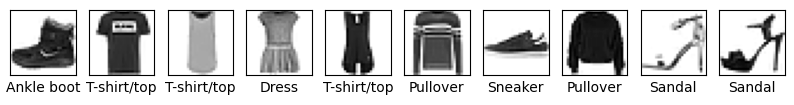

In [3]:
# 2. Роздрукувати 10 зображень
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [4]:
# 3. Підготовувати дані, побудувати архітектуру.
train_images = train_images / 255.0
test_images = test_images / 255.0

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Розгортання зображень у вектор
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Вихідний шар для 10 класів
])



C:\Users\ov_nastia\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# 5. Використати ранню зупинку і зменшення швидкості для запобіганнюперенавчанню.
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

In [6]:
# 6.Вивести архітектуру моделі.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7854 - loss: 0.6009 - val_accuracy: 0.8525 - val_loss: 0.4160 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8656 - loss: 0.3700 - val_accuracy: 0.8191 - val_loss: 0.4545 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8813 - loss: 0.3232 - val_accuracy: 0.8651 - val_loss: 0.3673 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8867 - loss: 0.3041 - val_accuracy: 0.8771 - val_loss: 0.3395 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8940 - loss: 0.2843 - val_accuracy: 0.8810 - val_loss: 0.3326 - learning_rate: 0.0010
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8986 - loss: 0.2657 - val_accuracy: 0.8797 - val_loss: 0.3304 - learning_rate: 0.0010
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9

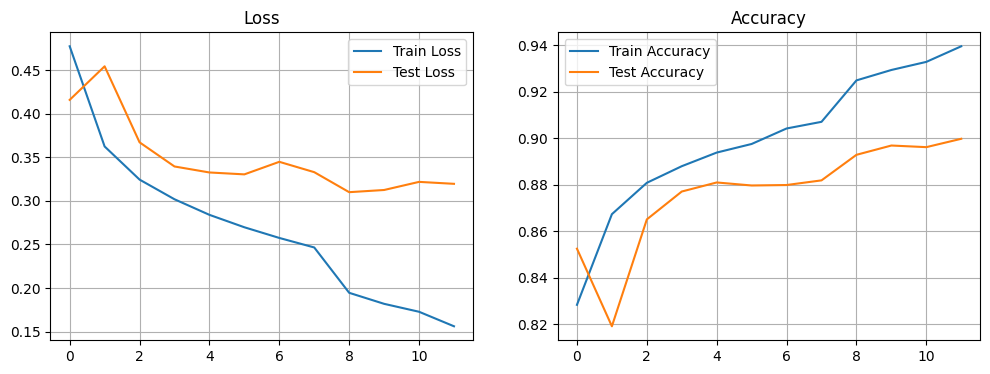

In [8]:
#7. Побудувати графіки функції втрат і точності для тренувальних і тестових даних

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

plt.show()

In [9]:
#8.Вивести класифікаційний звіт.
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
print(classification_report(test_labels, predicted_labels, target_names=class_names))


313/313 - 1s - 3ms/step - accuracy: 0.8929 - loss: 0.3100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.86      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.81      0.80      1000
       Dress       0.90      0.90      0.90      1000
        Coat       0.81      0.81      0.81      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.72      0.72      0.72      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



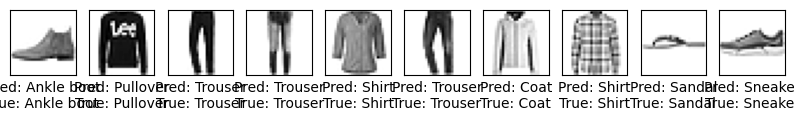

In [10]:
#9.Результати розпізнавання із прогнозованим і справжнім класом
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[test_labels[i]]}")
plt.show()

Завдання 2

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from kerastuner.tuners import RandomSearch

C:\Users\ov_nastia\AppData\Local\Temp\ipykernel_6864\3357596117.py:6: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [12]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train original shape (60000, 28, 28)
y_train original shape (60000,)


In [14]:
def build_model(hp):
    model = keras.Sequential()
    model.add(Flatten(input_shape=(28, 28)))

    # ШАРИ ЩО БУДУТЬ ТЮНУВАТИСЯ
    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                     min_value=32,
                                     max_value=512,
                                     step=32),
                        activation='relu',
                        kernel_regularizer=l2(0.001)))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))

    model.add(Dense(10, activation='softmax'))

    # КОМПІЛЯЦІЯ
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # збільшення кількості спроб для кращих результатів
    executions_per_trial=1,
    directory='tuner_logs',
    project_name='fashion_mnist_classification'
)

# РАННЯ ЗУПИНКА ТА ЗНИЖЕННЯ ШВИДКОСТІ
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

tuner.search(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr])

# НАЙКРАЩА МОДЕЛЬ
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

# ТРЕНУВАННЯ І ОЦІНКА
best_model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr])

test_loss, test_acc = best_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)



Trial 10 Complete [00h 03m 44s]
val_accuracy: 0.8970000147819519

Best val_accuracy So Far: 0.8992000222206116
Total elapsed time: 01h 33m 59s


C:\Users\ov_nastia\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 224)                 │         175,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224)                 │             896 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 224)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 192)                 │          43,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 192)                 │             768 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,930 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,634 (869.66 KB)

 Trainable params: 221,802 (866.41 KB)

 Non-trainable params: 832 (3.25 KB)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9094 - loss: 0.3008 - val_accuracy: 0.8851 - val_loss: 0.3866 - learning_rate: 1.0000e-04
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9045 - loss: 0.3188 - val_accuracy: 0.8856 - val_loss: 0.3936 - learning_rate: 1.0000e-04
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9040 - loss: 0.3169 - val_accuracy: 0.8787 - val_loss: 0.4003 - learning_rate: 1.0000e-04
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9048 - loss: 0.3178 - val_accuracy: 0.8806 - val_loss: 0.3888 - learning_rate: 1.0000e-04
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9106 - loss: 0.3007 - val_accuracy: 0.8937 - val_loss: 0.3598 - learning_rate: 5.0000e-05
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9162 - loss: 0.2845 - val_accuracy: 0.8960 - val_loss: 0.3589 - learning_rate: 5.0000e-05
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/ste